### Comet Setup

In [1]:
from comet_ml import Experiment
from config import api_key

# Setting the API key (saved as environment variable)
experiment = Experiment(
    api_key=api_key,
    project_name='covtype')


COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/krisograbek/covtype/93fc6db1346d40e4a32c80bb2ca6d397



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_covtype
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import (accuracy_score, 
    confusion_matrix, 
    recall_score, 
    precision_score, 
    f1_score
)


In [3]:
df = fetch_covtype(return_X_y=True, as_frame=True)
data = df[0]
target = df[1]
data.shape

(581012, 54)

In [4]:
target.shape

(581012,)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 54 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Elevation                           581012 non-null  float64
 1   Aspect                              581012 non-null  float64
 2   Slope                               581012 non-null  float64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  float64
 4   Vertical_Distance_To_Hydrology      581012 non-null  float64
 5   Horizontal_Distance_To_Roadways     581012 non-null  float64
 6   Hillshade_9am                       581012 non-null  float64
 7   Hillshade_Noon                      581012 non-null  float64
 8   Hillshade_3pm                       581012 non-null  float64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  float64
 10  Wilderness_Area_0                   581012 non-null  float64
 11  Wilderness_Area_1         

All columns are floats. Are they really?

In [6]:
data.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.044175,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.205483,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Convert Column Types

In [7]:
data.nunique()

Elevation                             1978
Aspect                                 361
Slope                                   67
Horizontal_Distance_To_Hydrology       551
Vertical_Distance_To_Hydrology         700
Horizontal_Distance_To_Roadways       5785
Hillshade_9am                          207
Hillshade_Noon                         185
Hillshade_3pm                          255
Horizontal_Distance_To_Fire_Points    5827
Wilderness_Area_0                        2
Wilderness_Area_1                        2
Wilderness_Area_2                        2
Wilderness_Area_3                        2
Soil_Type_0                              2
Soil_Type_1                              2
Soil_Type_2                              2
Soil_Type_3                              2
Soil_Type_4                              2
Soil_Type_5                              2
Soil_Type_6                              2
Soil_Type_7                              2
Soil_Type_8                              2
Soil_Type_9

There are 4 Wilderness areas are 40 soil types. These are binary values: 0 (absent), 1 (present).

In [8]:
columns = data.columns
bool_columns = [col for col in columns if col.startswith(("Soil_Type", "Wilderness"))]
# exclude boolean columns
num_columns = [col for col in columns if col not in bool_columns]
# num_columns
data[num_columns].applymap(lambda x: x.is_integer()).value_counts()

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  Hillshade_9am  Hillshade_Noon  Hillshade_3pm  Horizontal_Distance_To_Fire_Points
True       True    True   True                              True                            True                             True           True            True           True                                  581012
dtype: int64

No decimal values. We can convert the whole Data Frame to int

In [24]:
# data[bool_columns] = data[bool_columns].astype("bool")
# data.dtypes

### Target distribution

<AxesSubplot:>

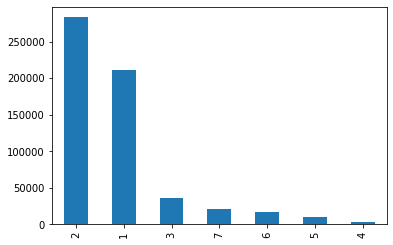

In [11]:
target.value_counts().plot(kind='bar')

In [12]:
# convert target values to range[0, 6]
min_val = target.min()
target = target.apply(lambda y: y-min_val)

In [13]:
# target distribution
target.value_counts() / len(target)

1    0.487599
0    0.364605
2    0.061537
6    0.035300
5    0.029891
4    0.016339
3    0.004728
Name: Cover_Type, dtype: float64

## Split the data
Let's take 100k examples and split it 80, 10, 10 (train, val, test)

To keep the target distribution we'll use `stratify`

In [14]:
random_state = 21

sample_size = 100000
test_size, val_size = 10000, 10000

_, X_train, _, y_train = train_test_split(data, target, stratify=target, test_size=sample_size, random_state=random_state)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, stratify=y_train, test_size=test_size, random_state=random_state)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, stratify=y_train, test_size=test_size, random_state=random_state)

Check shapes

In [15]:
print("Train shapes - data: {}, target: {}".format(X_train.shape, y_train.shape))
print("Val shapes - data: {}, target: {}".format(X_val.shape, y_val.shape))
print("Test shapes - data: {}, target: {}".format(X_test.shape, y_test.shape))

Train shapes - data: (80000, 54), target: (80000,)
Val shapes - data: (10000, 54), target: (10000,)
Test shapes - data: (10000, 54), target: (10000,)


Check distribution

In [16]:
print("Classes distribution")
print("Train set: ", y_train.value_counts() / len(y_train))
print("Val set: ", y_val.value_counts() / len(y_val))
print("Test set: ", y_test.value_counts() / len(y_test))

Classes distribution
Train set:  1    0.487600
0    0.364600
2    0.061538
6    0.035300
5    0.029888
4    0.016338
3    0.004738
Name: Cover_Type, dtype: float64
Val set:  1    0.4876
0    0.3646
2    0.0616
6    0.0353
5    0.0299
4    0.0163
3    0.0047
Name: Cover_Type, dtype: float64
Test set:  1    0.4876
0    0.3646
2    0.0615
6    0.0353
5    0.0299
4    0.0164
3    0.0047
Name: Cover_Type, dtype: float64


In [17]:
X_train.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39
316516,2935.0,24.0,11.0,30.0,3.0,1179.0,214.0,215.0,136.0,1266.0,...,False,False,False,False,False,False,False,False,False,False
552342,3314.0,93.0,20.0,124.0,16.0,2382.0,247.0,205.0,77.0,3890.0,...,False,False,False,False,False,False,False,False,False,True
518366,3179.0,193.0,5.0,242.0,38.0,268.0,219.0,244.0,160.0,2938.0,...,True,False,False,False,False,False,False,False,False,False
211206,3215.0,135.0,10.0,60.0,4.0,5116.0,236.0,236.0,131.0,277.0,...,False,False,False,False,False,False,False,True,False,False
246330,3034.0,321.0,7.0,295.0,82.0,1215.0,203.0,234.0,170.0,2034.0,...,False,True,False,False,False,False,False,False,False,False


## EDA for the training data

In [18]:
cov = X_train.copy()
cov = cov.merge(y_train, left_index=True, right_index=True)
cov.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Cover_Type
316516,2935.0,24.0,11.0,30.0,3.0,1179.0,214.0,215.0,136.0,1266.0,...,False,False,False,False,False,False,False,False,False,0
552342,3314.0,93.0,20.0,124.0,16.0,2382.0,247.0,205.0,77.0,3890.0,...,False,False,False,False,False,False,False,False,True,6
518366,3179.0,193.0,5.0,242.0,38.0,268.0,219.0,244.0,160.0,2938.0,...,False,False,False,False,False,False,False,False,False,1
211206,3215.0,135.0,10.0,60.0,4.0,5116.0,236.0,236.0,131.0,277.0,...,False,False,False,False,False,False,True,False,False,0
246330,3034.0,321.0,7.0,295.0,82.0,1215.0,203.0,234.0,170.0,2034.0,...,True,False,False,False,False,False,False,False,False,1


In [19]:
cov.rename(columns= {"Cover_Type": "target"}, inplace=True)

Text(0.5, 1.0, 'Correlation Matrix')

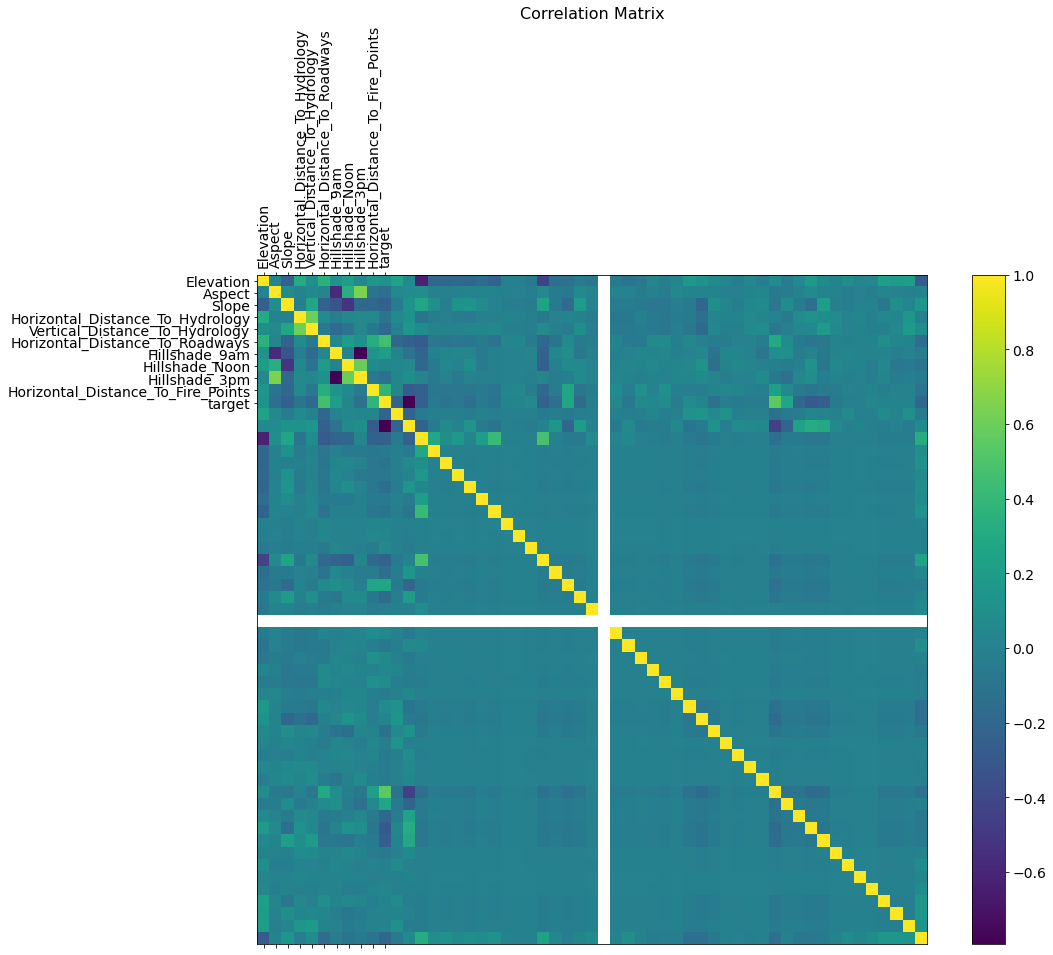

In [22]:
corr_matrix = cov.corr()

f = plt.figure(figsize=(16, 12))
plt.matshow(corr_matrix, fignum=f.number)
plt.xticks(range(cov.select_dtypes(['number']).shape[1]), cov.select_dtypes(['number']).columns, fontsize=14, rotation=90)
plt.yticks(range(cov.select_dtypes(['number']).shape[1]), cov.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)

In [23]:
corr_matrix["target"].sort_values(ascending=False)

target                                1.000000
Wilderness_Area_3                     0.319981
Soil_Type_9                           0.242932
Soil_Type_37                          0.154884
Soil_Type_38                          0.153122
Slope                                 0.149828
Soil_Type_39                          0.137054
Soil_Type_1                           0.114865
Soil_Type_5                           0.113135
Soil_Type_3                           0.097515
Soil_Type_16                          0.091325
Soil_Type_0                           0.090003
Soil_Type_34                          0.081489
Soil_Type_36                          0.081214
Soil_Type_4                           0.077554
Vertical_Distance_To_Hydrology        0.076480
Soil_Type_13                          0.067651
Soil_Type_2                           0.065003
Wilderness_Area_2                     0.064604
Soil_Type_10                          0.036499
Soil_Type_12                          0.023553
Soil_Type_35 

In [ ]:
cov["Soil_Type_14"].value_counts()

Soil Type 14 is never present. Drop it

In [ ]:
cov = cov.drop("Soil_Type_14", axis=1)

### Exploring Wilderness areas

In [ ]:
wild_cols = [col for col in cov.columns if col.startswith("Wilderness")]
wild = cov[wild_cols]

In [ ]:
# distribution
wild.sum()

In [ ]:
# unique values
wild.sum(axis=1).nunique()

Based on that we can tell, there is always one wilderness area in each sample

In [ ]:
corr_matrix["target"][wild_cols]

Check distribution for Area 0 and 3

In [21]:
area3 = cov.groupby(["Wilderness_Area_3"])
area0 = cov.groupby(["Wilderness_Area_0"])

In [ ]:
cov["target"].hist(by=cov["Wilderness_Area_3"])

In [ ]:
cov["target"].hist(by=cov["Wilderness_Area_0"])

In [ ]:
area3.target.value_counts()

In [ ]:
area0.target.value_counts()

In [ ]:
cov.target.value_counts().plot(kind='bar')

Same but with style

In [ ]:
cov.target.value_counts().to_frame().style.bar()

In [ ]:
cov.Elevation.hist(bins=10)

In [ ]:
# create categories
cov["elev_cat"] = pd.cut(cov["Elevation"],
                        bins=[0, 2500, 2800, 3100, 3300, np.inf],
                        labels=[1, 2, 3, 4, 5])
# convert to numerical
cov["elev_cat"] = cov["elev_cat"].cat.codes

cov["elev_cat"].hist()

In [ ]:
corr_matrix = cov.corr()
corr_matrix.target.sort_values(ascending=False)

In [ ]:
corr_matrix = cov.corr()
corr_matrix.target.sort_values(ascending=False)

f = plt.figure(figsize=(16, 12))
plt.matshow(corr_matrix, fignum=f.number)
plt.xticks(range(cov.select_dtypes(['number']).shape[1]), cov.select_dtypes(['number']).columns, fontsize=14, rotation=90)
plt.yticks(range(cov.select_dtypes(['number']).shape[1]), cov.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)

In [ ]:
corr_matrix.target.sort_values(ascending=False)